In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from Ising import Lattice

In [65]:
[Ms, Chis, Cs] = np.load('data/higher_dims2.npz')['stats_d'][1]
[M_errs, Chi_errs, C_errs] = np.load('data/higher_dims2.npz')['errs_d'][1]
print(Ms)

[0.5424906  0.52966753 0.51287568 0.49652817 0.48034618 0.46405792
 0.44458642 0.42377593 0.40102353 0.37563109 0.3491213  0.31532307
 0.27511019 0.2157379  0.1520663  0.06483137 0.06759147 0.0548396
 0.04744468 0.04214174]


In [15]:
def power_sing(T, alpha, a):
    return T ** alpha * a

def lin_fit(T, alpha, a):
    return T * alpha + a

def M_exp(T, T_c, beta, a):
    return a * (np.abs(T_c - T) ** (beta)) * (T < T_c)

In [16]:
K = 10
n = 200
ds = [3, 4, 5]
Ns = 14
T_steps = 20

Ts = np.linspace(6.25, 6.8, T_steps)

# Susceptibility

[-0.86053181  0.43384604]
0.05335197404895237


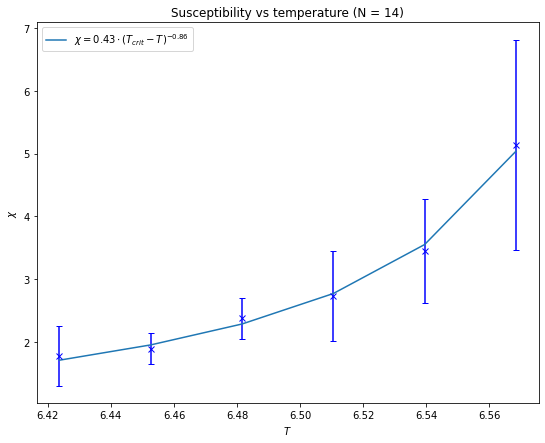

In [81]:
max = np.argmax(Chis)
T_c = Ts[max]
s = slice(6, max-1)
T_range = np.abs(Ts[s] - T_c)
Chi_range = Chis[s]
Chi_err_range = Chi_errs[s]

bounds_gamma = ([-3, -5], [0, 20])
fit, fit_err = curve_fit(power_sing, T_range, Chi_range, bounds=bounds_gamma, sigma=Chi_err_range)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(-T_range+T_c, Chi_range, Chi_err_range, capsize=3, fmt='bx')
Chi_pred = power_sing(T_range, gamma, a)
ax.plot(-T_range+T_c, Chi_pred)

ax.set_title("Susceptibility vs temperature ("+ f'{N = }' + ")")
ax.set_xlabel("$T$")
ax.set_ylabel("$\chi$")
fig.set_size_inches(9, 7)

ax.legend(["$\chi = 0.43\cdot(T_{crit} - T)^{-0.86}$"])
plt.savefig(r"Pics/gamma4d.png", format="png", dpi=1200)

# Specific heat

[0.02730027 1.79442651]
0.0519390816946132


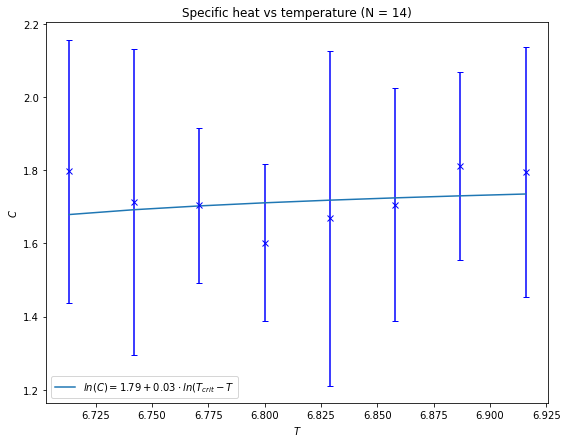

In [55]:
max = np.argmax(Cs)
T_c = Ts[max]
s = slice(3, max-2)
T_range = np.abs(Ts[s] - T_c)
C_range = Cs[s]
C_err_range = C_errs[s]

bounds_gamma = ([-0.8, -5], [0.5, 20])
fit, fit_err = curve_fit(power_sing, T_range, C_range, bounds=bounds_gamma, sigma=C_err_range)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_range+T_c, C_range, C_err_range, capsize=3, fmt='bx')
C_pred = power_sing(T_range, gamma, a)
ax.plot(T_range+T_c, C_pred)

ax.set_title("Specific heat vs temperature ("+ f'{N = }' + ")")
ax.set_xlabel("$T$")
ax.set_ylabel("$C$")
fig.set_size_inches(9, 7)

[0.02583149 0.58491382]
0.04957721237210671


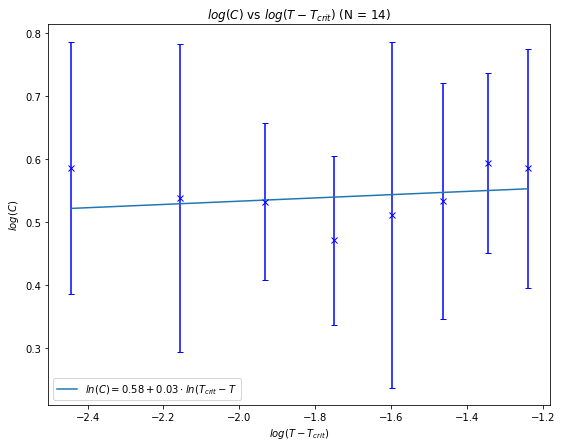

In [77]:
max = np.argmax(Cs)
T_c = Ts[max]
s = slice(3, max-2)
T_range = np.abs(Ts[s] - T_c)
T_log = np.log(T_range)
C_log = np.log(Cs[s])
C_log_err = C_errs[s]/Cs[s]

bounds_gamma = ([-0.5, -5], [0.5, 20])
fit, fit_err = curve_fit(lin_fit, T_log, C_log, bounds=bounds_gamma, sigma=C_log_err)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_log, C_log, C_log_err, capsize=3, fmt='bx')
C_pred = lin_fit(T_log, gamma, a)
ax.plot(T_log, C_pred)

ax.set_title("$log(C)$ vs $log(T-T_{crit})$ ("+ f'{N = }' + ")")
ax.set_xlabel("$log(T - T_{crit})$")
ax.set_ylabel("$log(C)$")
fig.set_size_inches(9, 7)

ax.legend(["$ln(C) = 0.58 + 0.03\cdot ln(T_{crit} - T})$"])
plt.savefig(r"Pics/alpha4d.png", format="png", dpi=1200)

# Magnetisation

[6.68877535 0.48932973 0.86570597]
0.0016416910210050937
0.021317496402425525


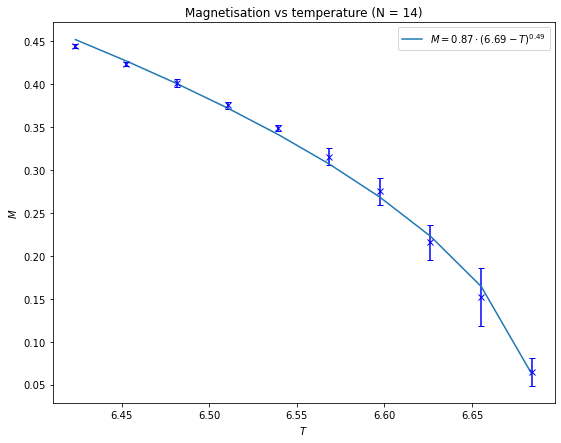

In [84]:
s = slice(6, -4)
T_range = Ts[s]
M_range = Ms[s]
M_err_range = M_errs[s]

bounds_gamma = ([6, 0, 0], [8, 1, 10])
fit, fit_err = curve_fit(M_exp, T_range, M_range, bounds=bounds_gamma)

print(fit)
print(np.sqrt(fit_err[0][0]))
print(np.sqrt(fit_err[1][1]))

[T_c, beta, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_range, M_range, M_err_range, capsize=3, fmt='bx')
M_pred = M_exp(T_range, T_c, beta, a)
ax.plot(T_range, M_pred)

ax.set_title("Magnetisation vs temperature ("+ f'{N = }' + ")")
ax.set_xlabel("$T$")
ax.set_ylabel("$M$")
fig.set_size_inches(9, 7)

ax.legend(["$M = 0.87\cdot(6.69 - T)^{0.49}$"])
plt.savefig(r"Pics/beta4d.png", format="png", dpi=1200)

In [59]:
K = 5
n = 150
H_min = 0.005
H_max = 0.3
H_steps = 20
Hs = np.geomspace(H_min, H_max, H_steps)
T_c = 6.69

bounds_alpha0 = ([2.26, 1, -10, -10], [2.4, 2, 10, 10])
bounds_alpha = ([0, 0], [0.6, 10])

l = Lattice(14, K=K, d=4)
Ms_0, M_errs_0 = [], []
for H in Hs:
    stat, err = l.stats(n, T_c, H=H, t0=100)
    Ms_0.append(stat[0]), M_errs_0.append(err[0])
[alpha, _], err = curve_fit(power_sing, Hs, Ms_0, bounds=bounds_alpha, sigma=M_errs_0)
alpha_err = np.sqrt(err[0,0])

print("alpha = " + str(alpha) + " +/- " + str(alpha_err))
print("delta = " + str(1/alpha) + " +/- " + str(alpha_err/alpha**2))

ERROR! Session/line number was not unique in database. History logging moved to new session 292
alpha = 0.2971152443450192 +/- 0.005826941582103173
delta = 3.365697381850828 +/- 0.06600712148013733


a = 0.9869733025943719 +/- 0.04779626767859884
alpha = 0.3229124235600067 +/- 0.012637709190731287
delta = 3.096814885520099 +/- 0.12119894771858496


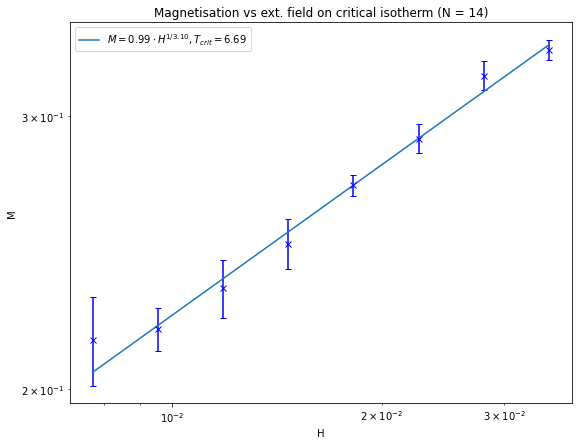

In [63]:
s = slice(2, -10)
H_range=Hs[s]
Ms=Ms_0[s]
M_errs=M_errs_0[s]


bounds_alpha = ([0, 0], [0.6, 10])
[alpha, a], err = curve_fit(power_sing, H_range, Ms, bounds=bounds_alpha, sigma=M_errs)
alpha_err = np.sqrt(err[0,0])
a_err = np.sqrt(err[1,1])

print(f'{a = } +/- {a_err}')
print("alpha = " + str(alpha) + " +/- " + str(alpha_err))
print("delta = " + str(1/alpha) + " +/- " + str(alpha_err/alpha**2))

fig, ax = plt.subplots()
ax.errorbar(H_range, Ms, M_errs, capsize=3, fmt="bx")
ax.plot(H_range, power_sing(H_range, alpha, a))
ax.set_title("Magnetisation vs ext. field on critical isotherm (N = 14)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("H")
ax.set_ylabel("M")

ax.legend(["$M = 0.99\cdot H^{1/3.10},  T_{crit} = 6.69$"])
fig.set_size_inches(9, 7)
plt.savefig(r"Pics/delta4d.png", format="png", dpi=1200, bbox_inches='tight')